In [31]:
import numpy as np
import pandas as pd

In [32]:
wine = pd.read_csv("winequality-white.csv", delimiter=";", header=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [33]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

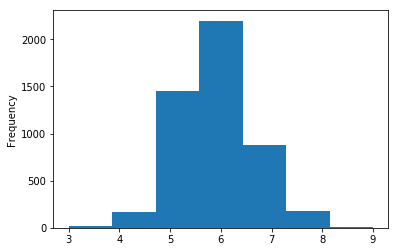

In [34]:
%matplotlib inline
wine.quality.plot.hist(bins=7)

In [35]:
#.values necessary only for weighting
#instead of fixed weighting, some min-max scaling would be better
wine["cumm_acid"] = (wine.iloc[:,0:3].values * np.array([[0.1, 1, 1]]) ).sum(axis=1)
wine.sort_values("cumm_acid", inplace=True)
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4259            3.8             0.310         0.02           11.10      0.036   
890             5.0             0.310         0.00            6.40      0.046   
864             4.8             0.330         0.00            6.50      0.028   
4298            5.6             0.260         0.00           10.20      0.038   
862             4.8             0.340         0.00            6.50      0.028   
2625            4.5             0.190         0.21            0.95      0.033   
3265            4.2             0.215         0.23            5.10      0.041   
3555            5.8             0.140         0.15            6.10      0.042   
3333            5.1             0.165         0.22            5.70      0.047   
3556            4.8             0.210         0.21           10.20      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4259                 20.0                 114.0  0.99248  3.75       0.44   
890                  43.0                 166.0  0.99400  3.30       0.63   
864                  34.0                 163.0  0.99370  3.35       0.61   
4298                 13.0                 111.0  0.99315  3.44       0.46   
862                  33.0                 163.0  0.99390  3.36       0.61   
2625                 89.0                 159.0  0.99332  3.34       0.42   
3265                 64.0                 157.0  0.99688  3.42       0.44   
3555                 27.0                 123.0  0.99362  3.06       0.60   
3333                 42.0                 146.0  0.99340  3.18       0.55   
3556                 17.0                 112.0  0.99324  3.66       0.48   

      alcohol  quality  cumm_acid  
4259     12.4        6      0.710  
890       9.9        6      0.810  
864       9.9        5      0.810  
4298     12.4        6      0.820  
862       9.9        6      0.820  
2625      8.0        5      0.850  
3265      8.0        3      0.865  
3555      9.9        6      0.870  
3333      9.9        6      0.895  
3556     12.2        7      0.900

In [36]:
#does acidity correlate with quality?
wine.corr()["quality"]

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
cumm_acid              -0.164990
Name: quality, dtype: float64

In [37]:
#labels (this is for the management) - simple variant1
wine["q_label"] = "Who knows"
wine["q_label"][wine.quality < 5] = "Hnus"
wine["q_label"][(wine.quality == 6) | (wine.quality == 5)] = "OK"
wine["q_label"][wine.quality > 7] = "Darek pro sefa"
wine.head(20)

C:\Users\peska\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\peska\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\peska\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4259            3.8             0.310         0.02           11.10      0.036   
890             5.0             0.310         0.00            6.40      0.046   
864             4.8             0.330         0.00            6.50      0.028   
4298            5.6             0.260         0.00           10.20      0.038   
862             4.8             0.340         0.00            6.50      0.028   
2625            4.5             0.190         0.21            0.95      0.033   
3265            4.2             0.215         0.23            5.10      0.041   
3555            5.8             0.140         0.15            6.10      0.042   
3333            5.1             0.165         0.22            5.70      0.047   
3556            4.8             0.210         0.21           10.20      0.037   
915             5.6             0.290         0.05            0.80      0.038   
528             5.2             0.360         0.02            1.60      0.031   
2587            5.1             0.140         0.25            0.70      0.039   
4470            4.7             0.145         0.29            1.00      0.042   
4711            5.4             0.205         0.16           12.55      0.051   
2321            4.6             0.445         0.00            1.40      0.053   
4532            5.8             0.120         0.21            1.30      0.056   
4718            5.2             0.240         0.15            7.10      0.043   
3411            6.0             0.140         0.17            5.60      0.036   
3966            5.4             0.185         0.19            7.10      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4259                 20.0                 114.0  0.99248  3.75       0.44   
890                  43.0                 166.0  0.99400  3.30       0.63   
864                  34.0                 163.0  0.99370  3.35       0.61   
4298                 13.0                 111.0  0.99315  3.44       0.46   
862                  33.0                 163.0  0.99390  3.36       0.61   
2625                 89.0                 159.0  0.99332  3.34       0.42   
3265                 64.0                 157.0  0.99688  3.42       0.44   
3555                 27.0                 123.0  0.99362  3.06       0.60   
3333                 42.0                 146.0  0.99340  3.18       0.55   
3556                 17.0                 112.0  0.99324  3.66       0.48   
915                  11.0                  30.0  0.99240  3.36       0.35   
528                  24.0                 104.0  0.98960  3.44       0.35   
2587                 15.0                  89.0  0.99190  3.22       0.43   
4470                 35.0                  90.0  0.99080  3.76       0.49   
4711                 31.0                 115.0  0.99564  3.40       0.38   
2321                 11.0                 178.0  0.99426  3.79       0.55   
4532                 35.0                 121.0  0.99080  3.32       0.33   
4718                 32.0                 134.0  0.99378  3.24       0.48   
3411                 37.0                 127.0  0.99373  3.05       0.57   
3966                 36.0                 110.0  0.99438  3.26       0.41   

      alcohol  quality  cumm_acid    q_label  
4259     12.4        6      0.710         OK  
890       9.9        6      0.810         OK  
864       9.9        5      0.810         OK  
4298     12.4        6      0.820         OK  
862       9.9        6      0.820         OK  
2625      8.0        5      0.850         OK  
3265      8.0        3      0.865       Hnus  
3555      9.9        6      0.870         OK  
3333      9.9        6      0.895         OK  
3556     12.2        7      0.900  Who knows  
915       9.2        5      0.900         OK  
528      12.2        6      0.900         OK  
2587      9.2        6      0.900         OK  
4470     11.3        6      

In [50]:
#labels (this is for the management) - simple variant2
wine.drop("q_label", axis=1, inplace=True)
q_labels = pd.DataFrame({
        "q_label":["Da sa prazakom","Nic moc","Nic moc","OK","Skvele","Skvele","Pro sefa"],
        "quality":[3,4,5,6,7,8,9]
    })
wine = pd.merge(wine, q_labels, on="quality")
wine.sort_values("cumm_acid", inplace=True)
wine.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               3.8             0.310         0.02           11.10      0.036   
2198            4.8             0.330         0.00            6.50      0.028   
1               5.0             0.310         0.00            6.40      0.046   
2               5.6             0.260         0.00           10.20      0.038   
3               4.8             0.340         0.00            6.50      0.028   
2199            4.5             0.190         0.21            0.95      0.033   
3655            4.2             0.215         0.23            5.10      0.041   
4               5.8             0.140         0.15            6.10      0.042   
5               5.1             0.165         0.22            5.70      0.047   
3675            4.8             0.210         0.21           10.20      0.037   
2200            5.6             0.290         0.05            0.80      0.038   
6               5.2             0.360         0.02            1.60      0.031   
7               5.1             0.140         0.25            0.70      0.039   
9               4.7             0.145         0.29            1.00      0.042   
2201            4.6             0.445         0.00            1.40      0.053   
8               5.4             0.205         0.16           12.55      0.051   
10              5.8             0.120         0.21            1.30      0.056   
11              5.2             0.240         0.15            7.10      0.043   
12              6.0             0.140         0.17            5.60      0.036   
13              5.4             0.185         0.19            7.10      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    20.0                 114.0  0.99248  3.75       0.44   
2198                 34.0                 163.0  0.99370  3.35       0.61   
1                    43.0                 166.0  0.99400  3.30       0.63   
2                    13.0                 111.0  0.99315  3.44       0.46   
3                    33.0                 163.0  0.99390  3.36       0.61   
2199                 89.0                 159.0  0.99332  3.34       0.42   
3655                 64.0                 157.0  0.99688  3.42       0.44   
4                    27.0                 123.0  0.99362  3.06       0.60   
5                    42.0                 146.0  0.99340  3.18       0.55   
3675                 17.0                 112.0  0.99324  3.66       0.48   
2200                 11.0                  30.0  0.99240  3.36       0.35   
6                    24.0                 104.0  0.98960  3.44       0.35   
7                    15.0                  89.0  0.99190  3.22       0.43   
9                    35.0                  90.0  0.99080  3.76       0.49   
2201                 11.0                 178.0  0.99426  3.79       0.55   
8                    31.0                 115.0  0.99564  3.40       0.38   
10                   35.0                 121.0  0.99080  3.32       0.33   
11                   32.0                 134.0  0.99378  3.24       0.48   
12                   37.0                 127.0  0.99373  3.05       0.57   
13                   36.0                 110.0  0.99438  3.26       0.41   

      alcohol  quality  cumm_acid         q_label  
0        12.4        6      0.710              OK  
2198      9.9        5      0.810         Nic moc  
1         9.9        6      0.810              OK  
2        12.4        6      0.820              OK  
3         9.9        6      0.820              OK  
2199      8.0        5      0.850         Nic moc  
3655      8.0        3      0.865  Da sa prazakom  
4         9.9        6      0.870              OK  
5         9.9        6      0.895              OK  
3675     12.2        7      0.900          Skvele  
2200      9.2        5      0.900         Nic moc  
6        12.2        6      0.900              OK  
7         

In [51]:
wine.groupby("q_label").agg("mean")

fixed acidity  volatile acidity  citric acid  residual sugar  \
q_label                                                                        
Da sa prazakom       7.600000          0.333250     0.336000        6.392500   
Nic moc              6.953642          0.309981     0.334290        7.062623   
OK                   6.837671          0.260564     0.338025        6.441606   
Pro sefa             7.420000          0.298000     0.386000        4.120000   
Skvele               6.721848          0.265194     0.325773        5.266919   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
q_label                                                                
Da sa prazakom   0.054300            53.325000            170.600000   
Nic moc          0.051401            35.116667            148.326235   
OK               0.045217            35.650591            137.047316   
Pro sefa         0.027400            33.400000            116.000000   
Skvele           0.038211            34.555924            125.289100   

                 density        pH  sulphates    alcohol   quality  cumm_acid  
q_label                                                                        
Da sa prazakom  0.994884  3.187500   0.474500  10.345000  3.000000   1.429250  
Nic moc         0.995163  3.170247   0.481593   9.843414  4.899383   1.339636  
OK              0.993961  3.188599   0.491106  10.575372  6.000000   1.282357  
Pro sefa        0.991460  3.308000   0.466000  12.180000  9.000000   1.426000  
Skvele          0.992416  3.214692   0.500303  11.412401  7.165877   1.263152

In [52]:
wine.groupby("q_label")["cumm_acid"].describe()

count      mean       std    min    25%    50%    75%    max
q_label                                                                      
Da sa prazakom    20.0  1.429250  0.277462  0.865  1.245  1.385  1.625  1.890
Nic moc         1620.0  1.339636  0.206394  0.810  1.195  1.320  1.450  2.455
OK              2198.0  1.282357  0.178092  0.710  1.170  1.260  1.370  2.600
Pro sefa           5.0  1.426000  0.127397  1.310  1.340  1.390  1.460  1.630
Skvele          1055.0  1.263152  0.138745  0.900  1.170  1.240  1.340  1.770

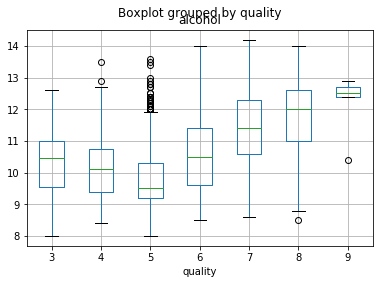

In [48]:
wine.boxplot(column=['alcohol'], by='quality')

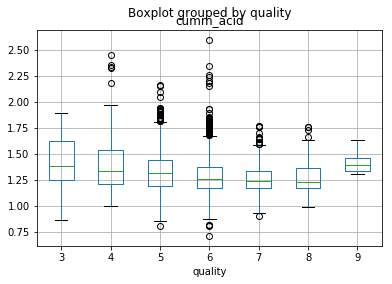

In [49]:
wine.boxplot(column=['cumm_acid'], by='quality')

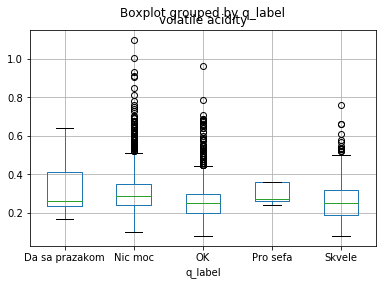

In [54]:
wine.boxplot(column=['volatile acidity'], by='q_label')